In [18]:
import pickle
from imblearn.under_sampling import RandomUnderSampler
from sklearn.svm import SVC
from sklearn.metrics import classification_report, confusion_matrix, ConfusionMatrixDisplay
import numpy as np
import matplotlib.pyplot as plt
from sklearn.model_selection import GridSearchCV

In [3]:
X_train = pickle.load( open( "../data/X_train.p", "rb" ) )
X_test = pickle.load( open( "../data/X_test.p", "rb" ) )
y_train = pickle.load( open( "../data/y_train.p", "rb" ) )
y_test = pickle.load( open( "../data/y_test.p", "rb" ) )

In [12]:
y_train.value_counts()

readmitted
0.0    72407
1.0     9206
Name: count, dtype: int64

In [11]:
rus = RandomUnderSampler()
X_train_undersampled, y_train_undersampled = rus.fit_resample(X_train, y_train)

print("Before undersampling:")
print(y_train.value_counts())
print("\nAfter undersampling:")
print(y_train_undersampled.value_counts())

Before undersampling:
readmitted
0.0    72407
1.0     9206
Name: count, dtype: int64

After undersampling:
readmitted
0.0    9206
1.0    9206
Name: count, dtype: int64


In [23]:
svc = SVC()

svc.fit(X_train_undersampled, y_train_undersampled.values.ravel())
y_pred = svc.predict(X_test)

print("Confusion Matrix:")
print(confusion_matrix(y_test, y_pred))
print("Classification Report:")
print(classification_report(y_test, y_pred))

Confusion Matrix:
[[11586  6416]
 [  992  1159]]
Classification Report:
              precision    recall  f1-score   support

         0.0       0.92      0.64      0.76     18002
         1.0       0.15      0.54      0.24      2151

    accuracy                           0.63     20153
   macro avg       0.54      0.59      0.50     20153
weighted avg       0.84      0.63      0.70     20153


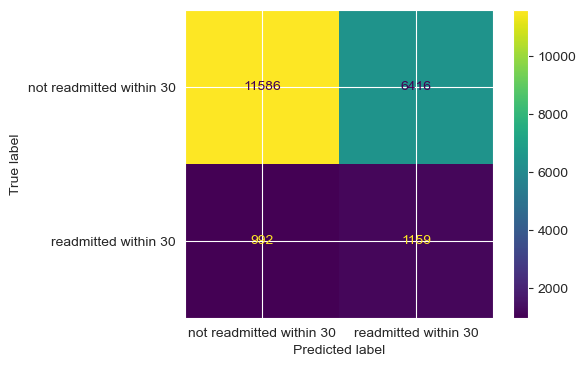

In [24]:
fig, ax = plt.subplots(figsize=(5, 4), dpi=100)
cm = confusion_matrix(y_test, y_pred)
cmp = ConfusionMatrixDisplay(cm, display_labels=['not readmitted within 30', 'readmitted within 30'])
cmp.plot(ax=ax)

In [27]:
parameters = {'kernel':('linear', 'rbf'), 'C':[1, 10], 'class_weight' : [{0:0.1,1:0.1}, {0:0.1,1:0.3}, {0:0.1,1:0.5}]}
clf = GridSearchCV(svc, parameters, n_jobs=-1)
svc.fit(X_train_undersampled, y_train_undersampled.values.ravel())

SVC()

AttributeError: 'GridSearchCV' object has no attribute 'cv_results_'